# Detail Rocket Deep Learning Recommendation System

## Imports and installs

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
#%pip install pandas
# %pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Load Data

Preprocessing was done in EDA notebook and stored in pickle files

In [124]:
basepath = '../datasets/preprocessed_datasets/retailrocket/'
category_tree = pd.read_pickle(basepath +'category_tree.pkl')
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [125]:
events = pd.read_pickle(basepath +'events.pkl')
events

,timestamp,visitorid,event,itemid,transactionid,datetime
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 05:13:05
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 05:30:13
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 04:57:00
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 05:08:50


In [126]:
item_properties = pd.read_pickle(basepath +'item_properties.pkl')
item_properties

,timestamp,itemid,property,value,datetime
0,1435460400000,460429,categoryid,1338,2015-06-28 05:00:00
1,1441508400000,206783,888,1116713 960601 n277.200,2015-09-06 05:00:00
2,1439089200000,395014,400,n552.000 639502 n720.000 424566,2015-08-09 05:00:00
3,1431226800000,59481,790,n15360.000,2015-05-10 05:00:00
4,1431831600000,156781,917,828513,2015-05-17 05:00:00
...,...,...,...,...,...
9275898,1433646000000,236931,929,n12.000,2015-06-07 05:00:00
9275899,1440903600000,455746,6,150169 639134,2015-08-30 05:00:00
9275900,1439694000000,347565,686,610834,2015-08-16 05:00:00
9275901,1433646000000,287231,867,769062,2015-06-07 05:00:00


In [127]:
visitor_actions = pd.read_pickle(basepath +'visitor_actions.pkl')
visitor_actions

,visitorid,products_viewed,num_views,num_add2cart,num_transaction
0,693516,1,1,2,0
1,829044,1,1,0,0
2,652699,1,1,0,0
3,1125936,1,1,0,0
4,1149227,1,1,0,0
...,...,...,...,...,...
1407575,998517,1,1,0,0
1407576,472345,1,1,0,0
1407577,1207677,1,1,0,0
1407578,255126,1,1,0,0


In [128]:
product_item_df = pd.read_pickle(basepath +'product_item.pkl')
product_item_df

,itemid,visitorid,view,addtocart,transaction
0,3,370720,1,0,0
1,3,639016,1,0,0
2,4,905555,1,0,0
3,4,1010132,1,0,0
4,4,1042455,1,0,0
...,...,...,...,...,...
2145174,466864,1388296,4,0,0
2145175,466867,241803,1,0,0
2145176,466867,450511,1,0,0
2145177,466867,1001859,1,0,0


# Training Stuff

In [129]:
visitor_actions['is_bought'] = (visitor_actions['num_transaction'] > 0)*1
X = visitor_actions[['products_viewed', 'num_views', 'num_add2cart']]
y = visitor_actions['is_bought']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

In [131]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=10)


In [132]:
random_forest.fit(X_train, y_train)
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [133]:
print('Characteristics of random forest model: \n', random_forest.get_params())
print(f"\nTrain Accuracy = {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy = {metrics.accuracy_score(y_test, y_test_pred)}")

Characteristics of random forest model: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Accuracy = 0.9920522152508967
Test Accuracy = 0.992007559073019


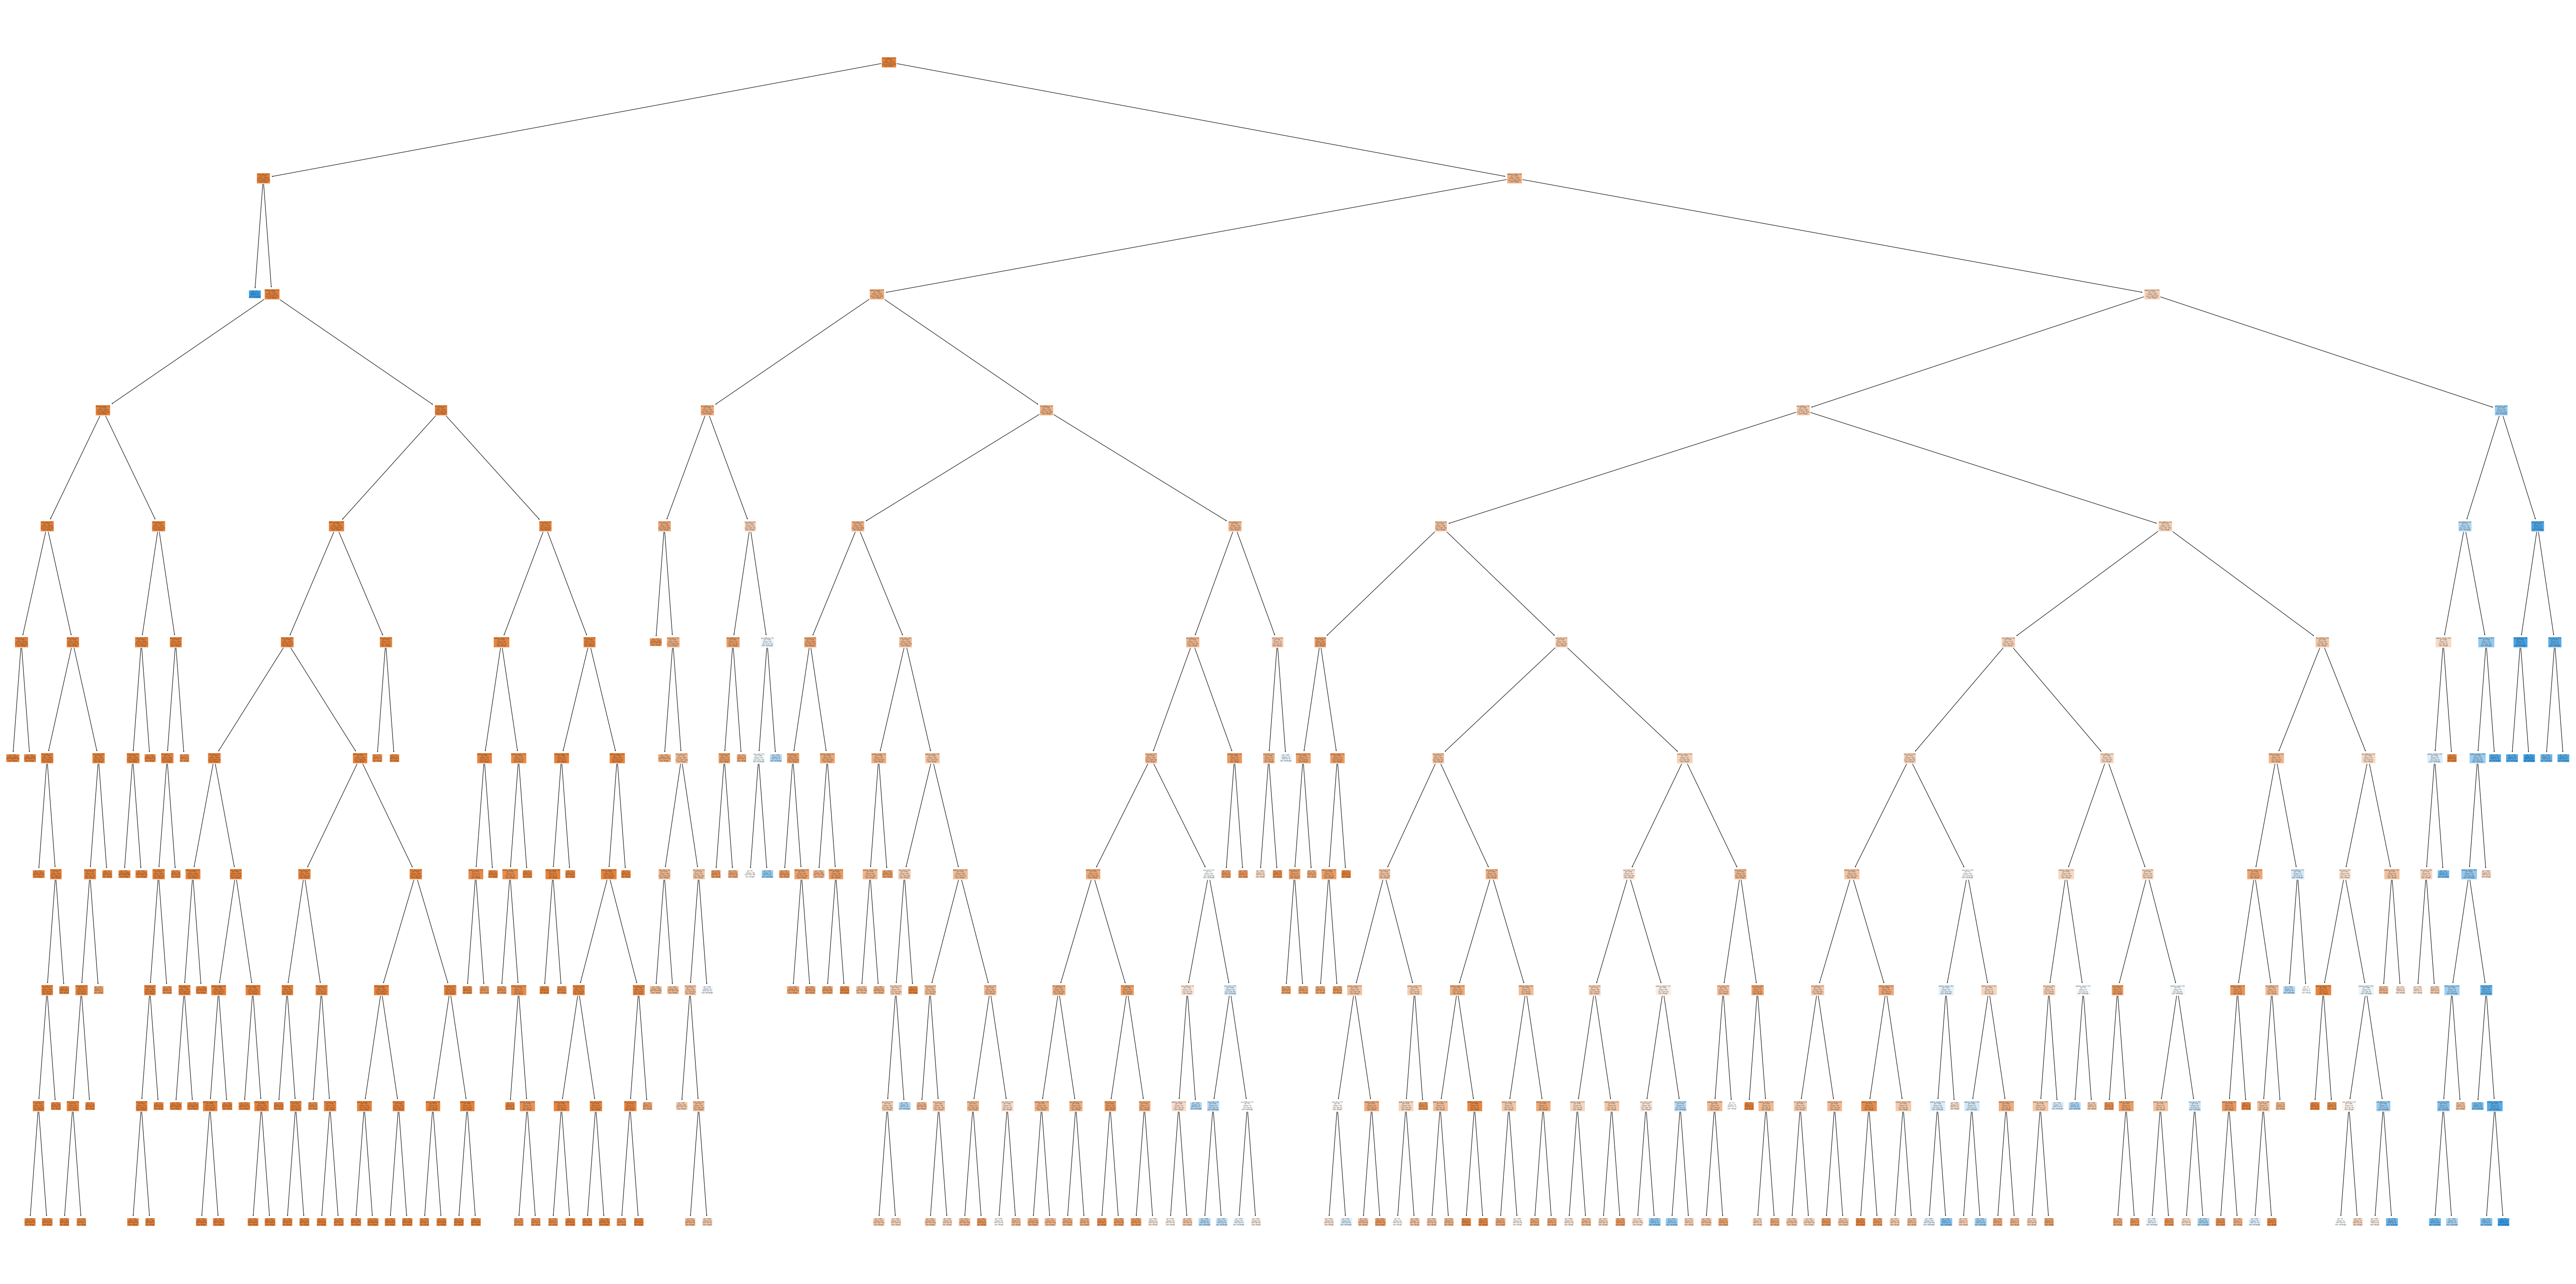

In [134]:
# Lets plot the decision tree (using a random estimator) to see how predictions were made

plt.figure(figsize=(80,40))
plot_tree(random_forest.estimators_[10], feature_names=X.columns, class_names=['Bought', "Not Bought"],filled=True)
plt.savefig("First model decision tree.svg", format='svg', dpi='figure')

In [135]:
# Generating output to explain predictions

output_df = pd.concat([X_train, X_test])
output_df['Target'] = pd.concat([y_train, y_test])
output_df['Prediction'] = y_train_pred.tolist() + y_test_pred.tolist()

display(output_df)

,products_viewed,num_views,num_add2cart,Target,Prediction
247566,1,1,0,0,0
1364355,1,1,0,0,0
887814,1,1,0,0,0
86129,1,0,1,0,0
941745,1,3,0,0,0
...,...,...,...,...,...
1048166,4,7,0,0,0
419175,1,1,0,0,0
1363101,1,1,0,0,0
122509,1,1,0,0,0


## Product Item Training

In [136]:
X = product_item_df[['view', 'addtocart']]
y = product_item_df['transaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

print('Characteristics of random forest model: \n', rf_classifier.get_params())
print(f"\nTrain Accuracy = {metrics.accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy = {metrics.accuracy_score(y_test, y_test_pred)}")

Characteristics of random forest model: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Accuracy = 0.990457670856572
Test Accuracy = 0.9900847481330238


In [137]:
output_df = pd.concat([X_train, X_test])
output_df['Target'] = pd.concat([y_train, y_test])
output_df['Prediction'] = y_train_pred.tolist() + y_test_pred.tolist()

display(output_df)
# print(output_df.Prediction.value_counts())



,view,addtocart,Target,Prediction
1413739,1,0,0,0
79489,1,0,0,0
1388092,1,0,0,0
800203,1,0,0,0
952226,1,0,0,0
...,...,...,...,...
624470,1,0,0,0
1551572,1,0,0,0
2132919,1,0,0,0
575405,1,0,0,0


IndexError: list index out of range

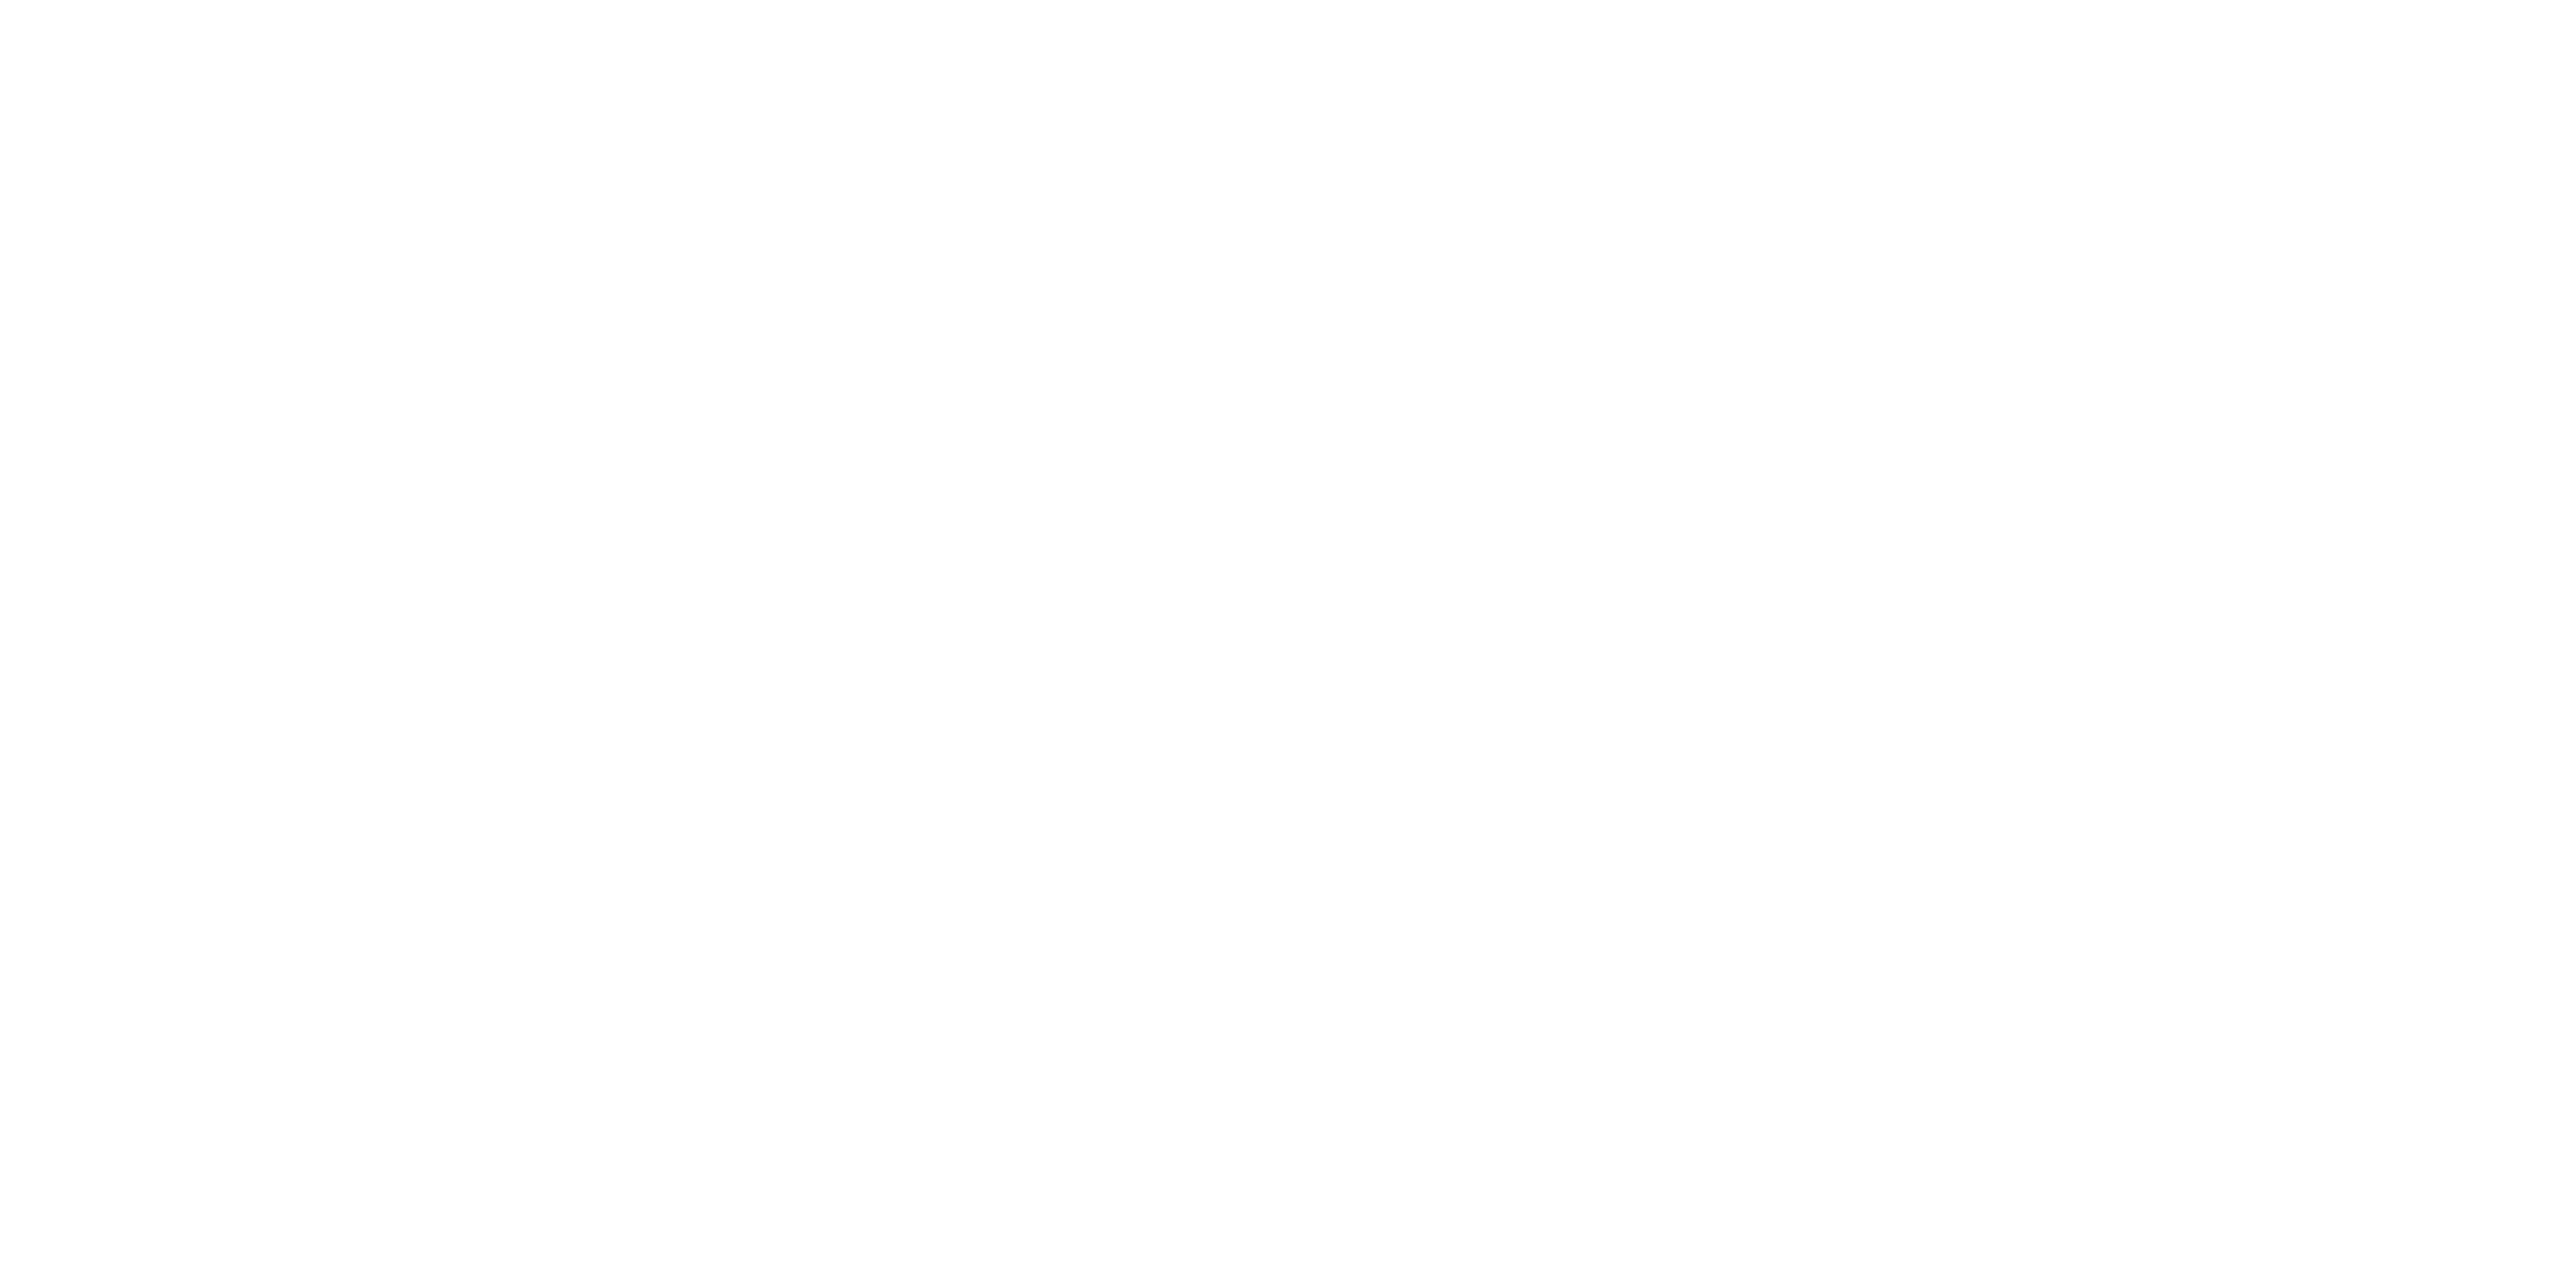

In [139]:
# Lets plot the decision tree (using a random estimator) to see how predictions were made

plt.figure(figsize=(80,40))
plot_tree(rf_classifier.estimators_[3], feature_names=X.columns, class_names=['Bought', "Not Bought"],filled=True)
